In [1]:
 #USING LINEAR REGRESSION FOR IDENTIFING CUSTOMER BEHAVIOUR (APP AND WEBSITE USAGE)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
customers = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/Varun101Varun/datasets_85008_196530_Ecommerce_Customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<AxesSubplot:>

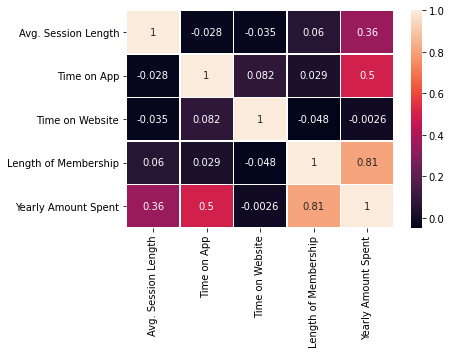

In [5]:
sns.heatmap(customers.corr(),linewidth=0.5,annot=True)

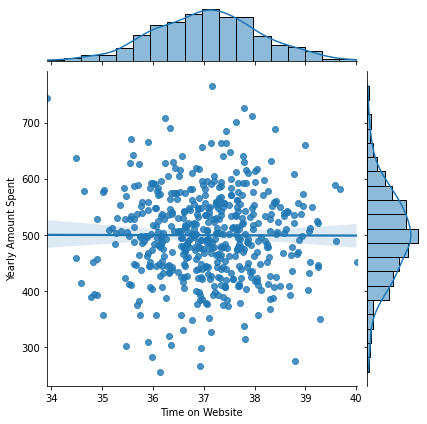

In [6]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Yearly Amount Spent',kind = 'reg')

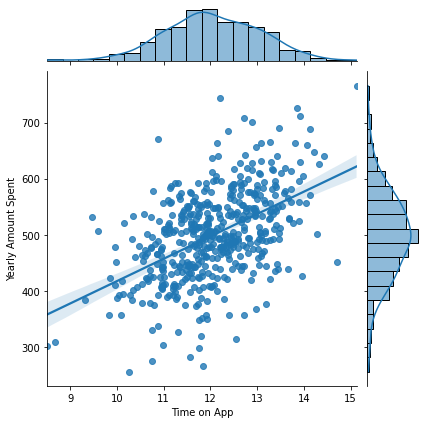

In [7]:
sns.jointplot(data = customers, x = 'Time on App', y = 'Yearly Amount Spent', kind = 'reg')

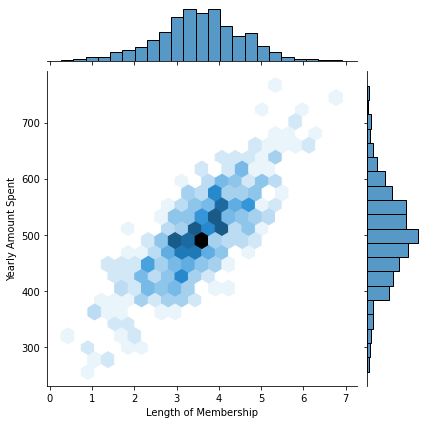

In [8]:
sns.jointplot(data = customers, x = 'Length of Membership', y = 'Yearly Amount Spent',kind = 'hex')

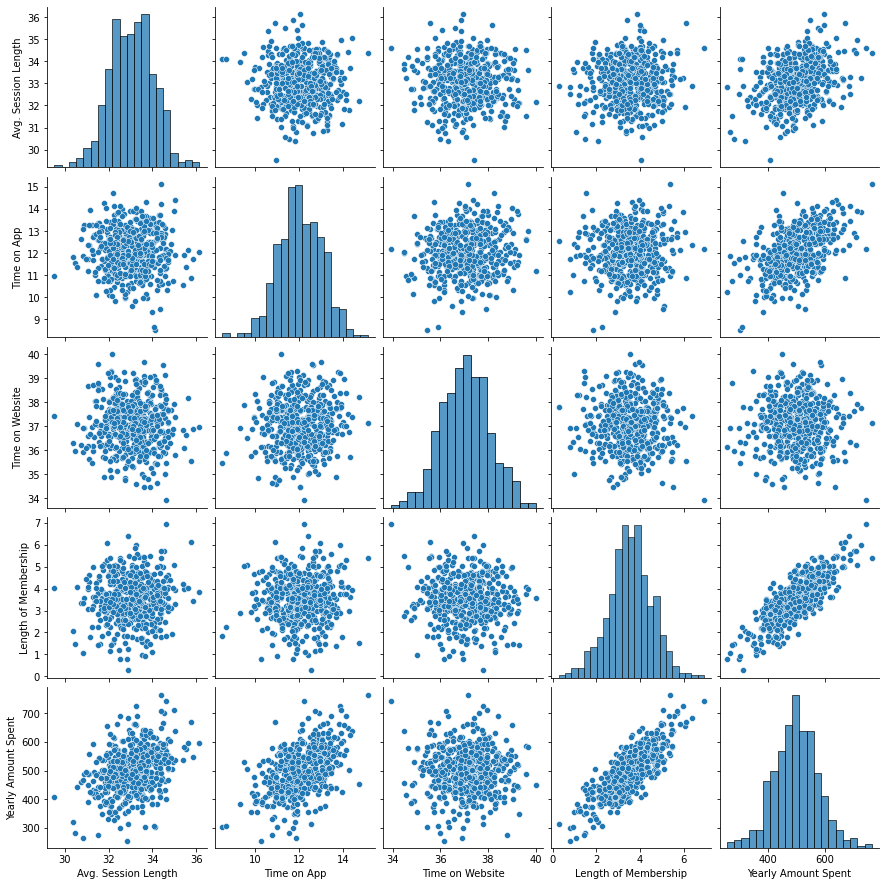

In [9]:
sns.pairplot(customers)

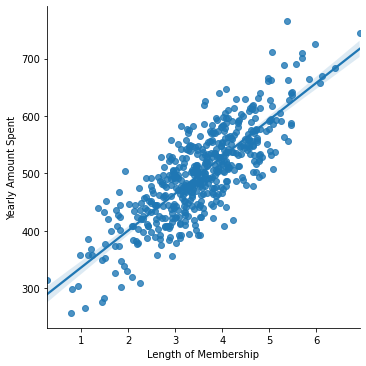

In [10]:
sns.lmplot(data = customers, x = 'Length of Membership', y = 'Yearly Amount Spent')

In [11]:
x = customers[['Time on App' , 'Avg. Session Length', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state=42)
lm = LinearRegression()

In [14]:
lm.fit(x_train,y_train)

LinearRegression()

In [15]:
coeff = pd.DataFrame(lm.coef_,x.columns,columns = ['Coefficient'])
coeff

,Coefficient
Time on App,38.688156
Avg. Session Length,25.690832
Time on Website,0.452799
Length of Membership,61.710503


Text(0, 0.5, 'Predicted Values')

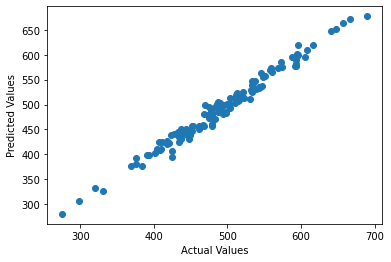

In [16]:
results = lm.predict(x_test)
plt.scatter(y_test,results)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [17]:
print('MAE ',metrics.mean_absolute_error(y_test,results))
print('MSE ',metrics.mean_squared_error(y_test,results))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,results)))

MAE  8.460454170141135
MSE  105.64514296279472
RMSE  10.278382312542899


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

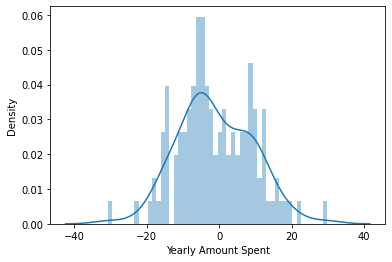

In [18]:
sns.distplot((y_test-results),bins=50)